# Model Architecture Diagram - High Level Diagram


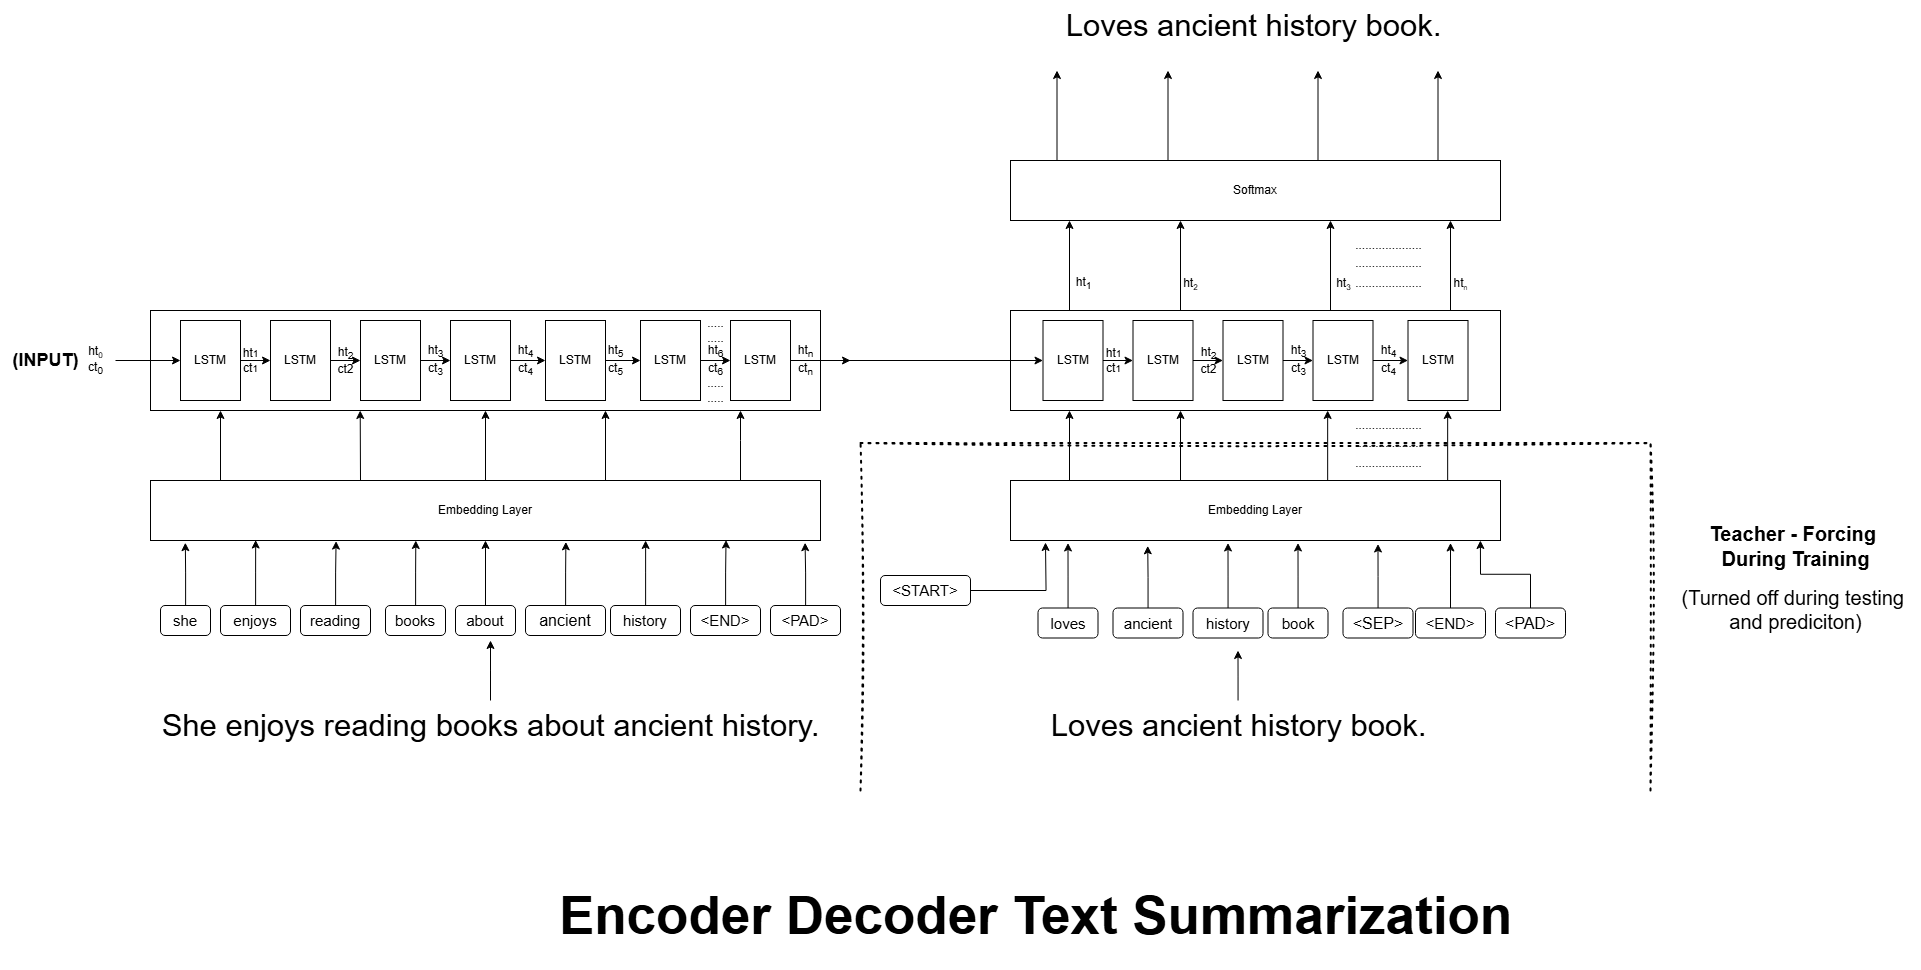

## Initial config:

```
config = {
    "embedding_dim": 300,
    "vocab_size": 50000,  
    "pretrained_embeddings": {
        "trainable": True,  
    },
    
  
    "encoder": {
        "hidden_dim": 1024,    
        "num_layers": 1,      
        "dropout": 0.2,    
    },


    "decoder": {
        "hidden_dim": 1024,
        "num_layers": 1,     
        "dropout": 0.2,     
    },


    "training": {
        "batch_size": 64,           
        "learning_rate": 1e-3,        
        "optimizer": "Adam",           
        "loss_function": "CrossEntropyLoss",
        "pad_token_index": 0,           
        "epochs": 20,                   
        "checkpoint_path": "/content/drive/MyDrive/text_summarizer_models/model_simple.pt",
    },

    # Input/Output Parameters
    "sequence": {
        "max_length": 100,  
    },

    # Additional Features
    "device": "cuda" if torch.cuda.is_available() else "cpu",
}

```

# Dataset

### CNN News Dataset
Note: Make sure you have proper resources. Encoder-Decoder models are complex and need much more resources.

In [ ]:
# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
# !kaggle datasets download gowrishankarp/newspaper-text-summarization-cnn-dailymail

Dataset URL: https://www.kaggle.com/datasets/gowrishankarp/newspaper-text-summarization-cnn-dailymail
License(s): CC0-1.0
 98% 495M/503M [00:05<00:00, 125MB/s]
100% 503M/503M [00:05<00:00, 99.6MB/s]


In [ ]:
# !unzip /content/newspaper-text-summarization-cnn-dailymail.zip

Archive:  /content/newspaper-text-summarization-cnn-dailymail.zip
  inflating: cnn_dailymail/test.csv  
  inflating: cnn_dailymail/train.csv  
  inflating: cnn_dailymail/validation.csv  


In [ ]:
# import pandas as pd
# import numpy as np

# df = pd.read_csv('/content/cnn_dailymail/train.csv', nrows=5000)
# df = df.drop('id', axis=1)
# df.head()

,article,highlights
0,By . Associated Press . PUBLISHED: . 14:11 EST...,"Bishop John Folda, of North Dakota, is taking ..."
1,(CNN) -- Ralph Mata was an internal affairs li...,Criminal complaint: Cop used his role to help ...
2,A drunk driver who killed a young woman in a h...,"Craig Eccleston-Todd, 27, had drunk at least t..."
3,(CNN) -- With a breezy sweep of his pen Presid...,Nina dos Santos says Europe must be ready to a...
4,Fleetwood are the only team still to have a 10...,Fleetwood top of League One after 2-0 win at S...


### Toy Dataset
Note: We have used this one due to limited resources.

In [ ]:
import pandas as pd

# Diverse data
data = [
    {"article": "Space exploration has led to advancements in satellite technology, enabling better communication, weather forecasting, and global navigation systems. NASA and SpaceX continue to innovate in this field, focusing on missions to the Moon and Mars.",
     "highlights": "Space exploration drives advancements in communication and navigation."},

    {"article": "The history of art spans centuries, from cave paintings to modern digital installations. Art reflects cultural, political, and social changes, serving as both documentation and a medium of expression.",
     "highlights": "Art documents and expresses cultural, political, and social changes."},

    {"article": "Renewable energy sources such as wind, solar, and hydropower are essential for combating climate change. Governments worldwide are increasing investments in green energy projects to reduce carbon emissions.",
     "highlights": "Renewable energy reduces carbon emissions and combats climate change."},

    {"article": "The culinary arts have evolved to include molecular gastronomy, where chefs use scientific techniques to create innovative dishes. This trend combines chemistry, physics, and artistry.",
     "highlights": "Molecular gastronomy blends science and art to create unique dishes."},

    {"article": "The history of mathematics includes breakthroughs like calculus, developed independently by Newton and Leibniz. Mathematics underpins advances in science, engineering, and technology.",
     "highlights": "Mathematics supports advancements in science, engineering, and technology."},

    {"article": "Esports is a growing industry where professional gamers compete in tournaments for games like League of Legends and Dota 2. It attracts millions of viewers globally, rivaling traditional sports in popularity.",
     "highlights": "Esports competes with traditional sports in global popularity."},

    {"article": "Archaeology is the study of human history through the excavation of sites and analysis of artifacts. Discoveries such as the Rosetta Stone have been crucial in understanding ancient civilizations.",
     "highlights": "Archaeology uses artifacts to uncover human history and ancient civilizations."},

    {"article": "The fashion industry is increasingly adopting sustainable practices, such as using recycled materials and reducing waste. Ethical fashion aims to minimize environmental impact while ensuring fair labor practices.",
     "highlights": "Sustainable fashion minimizes environmental impact and promotes ethics."},

    {"article": "Philosophy explores fundamental questions about existence, knowledge, and morality. Thinkers like Socrates and Kant have shaped our understanding of ethics, logic, and the nature of reality.",
     "highlights": "Philosophy addresses questions about existence, knowledge, and morality."},

    {"article": "Urban planning involves designing cities to optimize resources and improve quality of life. Modern urban planners focus on sustainable development and reducing urban sprawl.",
     "highlights": "Urban planning enhances resource optimization and sustainable development."},

    {"article": "Cryptography ensures secure communication in the digital age. Techniques like encryption are vital for protecting sensitive information, such as online banking and personal data.",
     "highlights": "Cryptography secures communication and protects sensitive information."},

    {"article": "Marine biology studies ocean ecosystems and the diverse species they support. Research in this field helps protect marine biodiversity and address issues like coral bleaching.",
     "highlights": "Marine biology protects ocean biodiversity and studies ecosystems."},

    {"article": "Mindfulness meditation involves focusing on the present moment to reduce stress and improve mental well-being. It has become a popular practice in both personal and professional settings.",
     "highlights": "Mindfulness meditation reduces stress and enhances mental well-being."},

    {"article": "Human-animal interaction research explores the psychological benefits of pet ownership, including reduced anxiety and increased social connection. Therapy animals are often used in mental health treatments.",
     "highlights": "Human-animal interaction reduces anxiety and enhances social bonds."},

    {"article": "Digital marketing leverages platforms like social media and email to reach consumers. Strategies include SEO, content marketing, and influencer partnerships to drive engagement.",
     "highlights": "Digital marketing uses social platforms to engage consumers and boost sales."},

    {"article": "The study of linguistics examines language structure, history, and usage. Linguists analyze phonetics, grammar, and semantics to understand how languages evolve and function.",
     "highlights": "Linguistics explores language structure and evolution through analysis."},

    {"article": "Bioinformatics combines biology, computer science, and statistics to analyze biological data. It plays a crucial role in fields like genomics and drug discovery.",
     "highlights": "Bioinformatics analyzes biological data for genomics and drug discovery."},

    {"article": "Astronomy is the study of celestial objects and phenomena. It encompasses areas like planetary science, stellar evolution, and cosmology, advancing our understanding of the universe.",
     "highlights": "Astronomy studies celestial objects and expands our knowledge of the universe."},

    {"article": "Psychology examines human behavior and mental processes. Fields such as cognitive psychology and behavioral therapy aim to understand and improve mental health.",
     "highlights": "Psychology studies human behavior and mental processes for better health."},

    {"article": "Geography explores Earth's physical features and human activities. Geographic information systems (GIS) are tools used to analyze spatial data for urban development and disaster management.",
     "highlights": "Geography uses GIS to analyze spatial data for urban and disaster planning."},
]

# Create DataFrame
df = pd.DataFrame(data)

# Display DataFrame
df.head()

,article,highlights
0,Space exploration has led to advancements in s...,Space exploration drives advancements in commu...
1,"The history of art spans centuries, from cave ...","Art documents and expresses cultural, politica..."
2,"Renewable energy sources such as wind, solar, ...",Renewable energy reduces carbon emissions and ...
3,The culinary arts have evolved to include mole...,Molecular gastronomy blends science and art to...
4,The history of mathematics includes breakthrou...,"Mathematics supports advancements in science, ..."


In [ ]:
df['article'][0]

'Space exploration has led to advancements in satellite technology, enabling better communication, weather forecasting, and global navigation systems. NASA and SpaceX continue to innovate in this field, focusing on missions to the Moon and Mars.'

In [ ]:
df['highlights'][0]

'Space exploration drives advancements in communication and navigation.'

### Dataset Preparation

In [ ]:
import re

def clean_text(text):
    text = re.sub(r'[^a-zA-Z0-9\s.]', '', text)  # Allowed: letters, numbers, fullstops, space
    text = text.lower()
    return text

In [ ]:
df['article'] = df['article'].apply(clean_text)
df['highlights'] = df['highlights'].apply(clean_text)

df = df.dropna(subset=['article', 'highlights'])
df.head()

,article,highlights
0,space exploration has led to advancements in s...,space exploration drives advancements in commu...
1,the history of art spans centuries from cave p...,art documents and expresses cultural political...
2,renewable energy sources such as wind solar an...,renewable energy reduces carbon emissions and ...
3,the culinary arts have evolved to include mole...,molecular gastronomy blends science and art to...
4,the history of mathematics includes breakthrou...,mathematics supports advancements in science e...


In [ ]:
import re

def tokenize(text, add_ovo=False, max_length=50):
    # Replace full stops with <SEP>
    text = re.sub(r'\.', ' <SEP> ', text)

    tokens = text.split()
    len_tokens = len(tokens)

    if not add_ovo:
        return tokens

    if len_tokens > max_length-2:
        tokens = tokens[:max_length-2]
    elif len_tokens < max_length-2:
        tokens = tokens + ['<END>'] + ['<PAD>'] * (max_length - 2 - len_tokens)

    tokens = ['<START>'] + tokens
    return tokens

df['article_tokens'] = df['article'].apply(lambda text: tokenize(text, add_ovo=False))
df['highlights_tokens'] = df['highlights'].apply(lambda text: tokenize(text, add_ovo=True))

In [ ]:
df.head()

,article,highlights,article_tokens,highlights_tokens
0,space exploration has led to advancements in s...,space exploration drives advancements in commu...,"[space, exploration, has, led, to, advancement...","[<START>, space, exploration, drives, advancem..."
1,the history of art spans centuries from cave p...,art documents and expresses cultural political...,"[the, history, of, art, spans, centuries, from...","[<START>, art, documents, and, expresses, cult..."
2,renewable energy sources such as wind solar an...,renewable energy reduces carbon emissions and ...,"[renewable, energy, sources, such, as, wind, s...","[<START>, renewable, energy, reduces, carbon, ..."
3,the culinary arts have evolved to include mole...,molecular gastronomy blends science and art to...,"[the, culinary, arts, have, evolved, to, inclu...","[<START>, molecular, gastronomy, blends, scien..."
4,the history of mathematics includes breakthrou...,mathematics supports advancements in science e...,"[the, history, of, mathematics, includes, brea...","[<START>, mathematics, supports, advancements,..."


In [ ]:
print(f"Tokenized sentence: {df['highlights_tokens'][0]}")
print(f"Length of tokenized sentence: {len(df['highlights_tokens'][0])}")

print(f"Tokenized article: {df['article_tokens'][0]}")
print(f"Length of article sentence: {len(df['article_tokens'][0])}")

Tokenized sentence: ['<START>', 'space', 'exploration', 'drives', 'advancements', 'in', 'communication', 'and', 'navigation', '<SEP>', '<END>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
Length of tokenized sentence: 50
Tokenized article: ['space', 'exploration', 'has', 'led', 'to', 'advancements', 'in', 'satellite', 'technology', 'enabling', 'better', 'communication', 'weather', 'forecasting', 'and', 'global', 'navigation', 'systems', '<SEP>', 'nasa', 'and', 'spacex', 'continue', 'to', 'innovate', 'in', 'this', 'field', 'focusing', 'on', 'missions', 'to', 'the', 'moon', 'and', 'mars', '<SEP>']
Length of article sentence: 37


### Text Embedding Model
Embeddings are created with Gensim's Word2vec model

In [ ]:
from gensim.models import Word2Vec

# # Combine the article and highlight tokens into a single corpus for training
corpus = df['article_tokens'].tolist() + df['highlights_tokens'].tolist()
vector_size=256
word2vec_model = Word2Vec(sentences=corpus, vector_size=vector_size, window=5, min_count=1, workers=4)
# word2vec_model.save("/content/drive/MyDrive/word2vec_model_1.model")

In [ ]:
from gensim.models import Word2Vec
word2vec_model = Word2Vec.load("/content/drive/MyDrive/word2vec_model_1.model")

In [ ]:
import numpy as np
import torch
from torch import nn

In [ ]:
vocab = set(token for tokens in corpus for token in tokens)
vocab.add('<UNK>')
word2idx = {word: idx for idx, word in enumerate(vocab)}
idx2word = {idx: word for word, idx in word2idx.items()}

In [ ]:
word2idx['bishop'], word2idx['<START>'], word2idx['<END>'], word2idx['<UNK>'], word2idx['<SEP>']

(62399, 81084, 25280, 50582, 19628)

In [ ]:
embedding_dim = vector_size  # Should match the vector size used during training
embedding_matrix = np.zeros((len(vocab), embedding_dim))

In [ ]:
for word, idx in word2idx.items():
    if word in word2vec_model.wv:
        embedding_matrix[idx] = word2vec_model.wv[word]
    else:
        embedding_matrix[idx] = np.random.uniform(-0.1, 0.1, embedding_dim)  # Random initialization for unknown words

embedding_tensor = torch.FloatTensor(embedding_matrix)
embedding_tensor.shape

torch.Size([354, 256])

In [ ]:
number_of_unique_words, embedding_dim = embedding_tensor.shape
number_of_unique_words, embedding_dim

(354, 256)

### Creating Dataset Model

In [ ]:
from torch.utils.data import Dataset, DataLoader
class TextSummarizationDataset(Dataset):
    def __init__(self, df, word2idx, embedding_dim=100):
        self.df = df
        self.word2idx = word2idx
        self.embedding_dim = embedding_dim

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        article = self.df['article_tokens'].iloc[idx]
        highlights = self.df['highlights_tokens'].iloc[idx]

        article_indices = [self.word2idx.get(word, self.word2idx['<UNK>']) for word in article]
        highlight_indices = [self.word2idx.get(word, self.word2idx['<UNK>']) for word in highlights]

        return torch.tensor(article_indices), torch.tensor(highlight_indices)

In [ ]:
from torch.nn.utils.rnn import pad_sequence

def collate_fn(batch):
    source, target = zip(*batch)
    source_padded = pad_sequence(source, batch_first=True, padding_value=word2idx['<PAD>'])
    target_padded = pad_sequence(target, batch_first=True, padding_value=word2idx['<PAD>'])

    return source_padded, target_padded

In [ ]:
dataset = TextSummarizationDataset(df, word2idx, embedding_dim)
dataloader = DataLoader(dataset, batch_size=1, collate_fn=collate_fn, shuffle=True)

# Model Building

In [ ]:
class LSTM_Encoder(nn.Module):
    def __init__(self, input_shape: int, hidden_shape: int):

        super(LSTM_Encoder, self).__init__()
        self.hidden_shape = hidden_shape
        self.sigmoid = nn.Sigmoid()
        self.tanh = nn.Tanh()

        # LSTM gates
        self.forget_gate_layer = nn.Linear(in_features=input_shape + hidden_shape, out_features=hidden_shape)
        self.input_gate_sig_layer = nn.Linear(in_features=input_shape + hidden_shape, out_features=hidden_shape)
        self.input_gate_tanh_layer = nn.Linear(in_features=input_shape + hidden_shape, out_features=hidden_shape)
        self.output_gate_layer = nn.Linear(in_features=input_shape + hidden_shape, out_features=hidden_shape)

        # Final output layer to match the input size
        self.output_layer = nn.Linear(hidden_shape, input_shape)

    def forward(self, x):

        batch_size, seq_length, input_shape = x.size()

        ht = torch.zeros(batch_size, self.hidden_shape, device=x.device)
        ct = torch.zeros(batch_size, self.hidden_shape, device=x.device)

        for t in range(seq_length):
            xt = x[:, t, :]
            concatenated_input = torch.cat((ht, xt), dim=1)

            # Forget gate
            ft = self.sigmoid(self.forget_gate_layer(concatenated_input))
            ct = ft * ct

            # Input gate
            it = self.sigmoid(self.input_gate_sig_layer(concatenated_input))
            candidate_ct = self.tanh(self.input_gate_tanh_layer(concatenated_input))
            ct = ct + (it * candidate_ct)

            # Output gate
            ot = self.sigmoid(self.output_gate_layer(concatenated_input))
            ht = ot * self.tanh(ct)

        return ht, ct


In [ ]:
class LSTM_Decoder(nn.Module):
    def __init__(self, input_shape: int, hidden_shape: int, vocab_size: int, embedding_dim=100):
        super(LSTM_Decoder, self).__init__()
        self.hidden_shape = hidden_shape
        self.sigmoid = nn.Sigmoid()
        self.tanh = nn.Tanh()

        # Embedding and Output projection layers
        self.embedding_layer = nn.Embedding(vocab_size, embedding_dim)
        self.fc = nn.Linear(hidden_shape, vocab_size)
        self.softmax = nn.Softmax(dim=1)

        # LSTM gates
        self.forget_gate_layer = nn.Linear(in_features=input_shape + hidden_shape, out_features=hidden_shape)
        self.input_gate_sig_layer = nn.Linear(in_features=input_shape + hidden_shape, out_features=hidden_shape)
        self.input_gate_tanh_layer = nn.Linear(in_features=input_shape + hidden_shape, out_features=hidden_shape)
        self.output_gate_layer = nn.Linear(in_features=input_shape + hidden_shape, out_features=hidden_shape)

    def forward(self, target, ht, ct):
      target_embedding = target.long()
      batch_size, seq_length, input_shape = target_embedding.size()

      outputs = []

      for t in range(seq_length):
          xt = target_embedding[:, t, :]  # [batch_size, input_shape]
          # xt = target_embedding[:, t, :].unsqueeze(1) => if batch size > 1
          concatenated_input = torch.cat((ht, xt), dim=1)  # [batch_size, input_shape + hidden_shape]

          # Forget gate
          ft = self.sigmoid(self.forget_gate_layer(concatenated_input))  # [batch_size, hidden_shape]
          ct = ft * ct

          # Input gate
          it = self.sigmoid(self.input_gate_sig_layer(concatenated_input))  # [batch_size, hidden_shape]
          candidate_ct = self.tanh(self.input_gate_tanh_layer(concatenated_input))  # [batch_size, hidden_shape]
          ct = ct + (it * candidate_ct)

          # Output gate
          ot = self.sigmoid(self.output_gate_layer(concatenated_input))  # [batch_size, hidden_shape]
          ht = ot * self.tanh(ct)  # [batch_size, hidden_shape]

          # Generate output for this timestep
          output = self.fc(ht)  # [batch_size, vocab_size]
          outputs.append(output)  # Do not apply softmax here

      # Stack all timestep outputs: [batch_size, seq_length, vocab_size]
      outputs = torch.stack(outputs, dim=1)

      return outputs


    def predict(self, start_token, ht, ct, max_len=50):
        start_token_embedding = start_token.long()  # [batch_size, embedding_dim]
        # print(f"start_token_embedding shape: {start_token.shape}")
        batch_size, input_shape = start_token_embedding.size()

        outputs = []
        xt = start_token_embedding

        for _ in range(max_len):
            concatenated_input = torch.cat((ht, xt), dim=1)  # [batch_size, input_shape + hidden_shape]

            # Forget gate
            ft = self.sigmoid(self.forget_gate_layer(concatenated_input))  # [batch_size, hidden_shape]
            ct = ft * ct

            # Input gate
            it = self.sigmoid(self.input_gate_sig_layer(concatenated_input))  # [batch_size, hidden_shape]
            candidate_ct = self.tanh(self.input_gate_tanh_layer(concatenated_input))  # [batch_size, hidden_shape]
            ct = ct + (it * candidate_ct)

            # Output gate
            ot = self.sigmoid(self.output_gate_layer(concatenated_input))  # [batch_size, hidden_shape]
            ht = ot * self.tanh(ct)  # [batch_size, hidden_shape]

            # Generate output for this timestep
            output = self.fc(ht)  # [batch_size, vocab_size]
            output = self.softmax(output)  # Apply softmax to get probabilities => [batch_size, vocab_size]
            outputs.append(output)

            # Update xt with the embedding of the predicted token
            predicted_token = torch.argmax(output, dim=1)  # [batch_size]
            xt = self.embedding_layer(predicted_token)  # [batch_size, embedding_dim]

        # Stack all timestep outputs: [batch_size, max_len, vocab_size]
        outputs = torch.stack(outputs, dim=1)

        return outputs


In [ ]:
class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder, pretrained_embeddings):
        super(Seq2Seq, self).__init__()
        self.encoder = encoder
        self.decoder = decoder
        self.embedding_layer = nn.Embedding.from_pretrained(pretrained_embeddings, freeze=False)

    def forward(self, source, target):
        '''
          source: [batch_size, seq_len]
          target: [batch_size, seq_len]
        '''
        source_emb = self.embedding_layer(source)  # [batch_size, seq_length, embedding_dim]
        ht, ct = self.encoder(source_emb)
        target_emb = self.embedding_layer(target)  # [batch_size, seq_length, embedding_dim]
        outputs = self.decoder(target_emb, ht, ct)
        return outputs

    def predict(self, source, start_token_id):
        '''
          source: [batch_size, seq_len]
          start_token_id: tensor
        '''
        source_emb = self.embedding_layer(source)  # [batch_size, seq_length, embedding_dim]
        ht, ct = self.encoder(source_emb)
        start_token_embed = self.embedding_layer(start_token_id)  # [batch_size, embedding_dim]
        outputs = self.decoder.predict(start_token_embed, ht, ct) # outputs => [batch_size, max_len, vocab_size]
        return outputs

# Model Initialization

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import os

# Define model components
hidden_dim = 1024
vocab_size = number_of_unique_words
checkpoint_path = "/content/drive/MyDrive/text_summarizer_models/model_simple.pt"

start_epoch = 0
loss = float('inf')
loss_list = []  # To store the list of losses

# Initialize model components
encoder = LSTM_Encoder(input_shape=embedding_dim, hidden_shape=hidden_dim)
decoder = LSTM_Decoder(input_shape=embedding_dim, hidden_shape=hidden_dim, vocab_size=vocab_size, embedding_dim=embedding_dim)
model = Seq2Seq(encoder=encoder, decoder=decoder, pretrained_embeddings=embedding_tensor)
model = model.cuda() if torch.cuda.is_available() else model
optimizer = optim.Adam(model.parameters())

# Function to load checkpoint
def load_model_checkpoint(checkpoint_path, model, optimizer):
    if os.path.exists(checkpoint_path):
        checkpoint = torch.load(checkpoint_path)
        model.load_state_dict(checkpoint['model_state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        start_epoch = checkpoint['epoch']
        loss = checkpoint['loss']
        loss_list = checkpoint.get('loss_list', [])  # Load loss list if available
        return model, optimizer, start_epoch, loss, loss_list
    else:
        print("No checkpoint found.")
        return model, optimizer, 0, float('inf'), []

# Load the checkpoint if available
if os.path.exists(checkpoint_path):
    model, optimizer, start_epoch, loss, loss_list = load_model_checkpoint(checkpoint_path, model, optimizer)
    print(f"Checkpoint found. Resuming from epoch {start_epoch}. Loss: {loss}")
    print(f"Loss list from checkpoint: {loss_list}")


criterion = nn.CrossEntropyLoss(ignore_index=word2idx['<PAD>'])

In [ ]:
def generate_summary(model, input_text, word2idx, idx2word, max_length=50):
    # Preprocess the input text and convert to tensor
    input_tokens = tokenize(input_text, add_ovo=False, max_length=max_length)  # Use the tokenize function
    input_indices = [word2idx.get(word, word2idx['<UNK>']) for word in input_tokens]
    input_tensor = torch.tensor(input_indices).unsqueeze(0)
    if torch.cuda.is_available():
      input_tensor = input_tensor.cuda()  # Move to GPU

    # Generate embedding for the input
    with torch.no_grad():
        start_token_tensor = torch.tensor([word2idx['<START>']], dtype=torch.long)  # Move to GPU
        if torch.cuda.is_available():
          start_token_tensor = start_token_tensor.cuda()
        output = model.predict(input_tensor, start_token_tensor)

    # Convert output indices to words and stop at <END>
    generated_summary = []
    output_indices = torch.argmax(output, dim=-1).cpu().numpy()  # Move to CPU for easy conversion

    for idx in output_indices[0]:
        word = idx2word.get(idx, '<UNK>')
        if word == '<END>' or len(generated_summary) >= max_length:
            break
        # Ignore <START> token, do not append it
        if word != '<START>':
            generated_summary.append(word)

    # Post-process the output by replacing <SEP> with full stops
    generated_summary = [word.replace('<SEP>', '.') for word in generated_summary]

    return generated_summary


# Model Training

In [ ]:
import torch.optim as optim
import torch.nn.functional as F
from tqdm import tqdm
import os

epochs = 100

# Early stopping parameters
patience = 5  # Number of epochs with no improvement before stopping
best_loss = float('inf')
patience_counter = 0

# Directory to save the model
save_dir = "/content/drive/MyDrive/text_summarizer_models"
os.makedirs(save_dir, exist_ok=True)

for epoch in range(start_epoch, epochs):
    model.train()
    total_loss = 0

    # Using tqdm for progress bar
    with tqdm(dataloader, unit="batch") as tepoch:
        for batch_idx, (source, target) in enumerate(tepoch):
            # Move tensors to GPU if available
            source = source.cuda() if torch.cuda.is_available() else source
            target = target.cuda() if torch.cuda.is_available() else target

            # Zero gradients
            optimizer.zero_grad()

            # Forward pass through the model
            outputs = model(source, target)

            outputs = outputs.view(-1, outputs.size(-1))
            target = target.view(-1)
            loss = criterion(outputs, target)

            loss.backward()
            optimizer.step()
            total_loss += loss.item()

            tepoch.set_postfix(loss=total_loss / (batch_idx + 1))  # Update progress bar with loss

    avg_loss = total_loss / len(dataloader)
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss}")

    # Early stopping logic
    if avg_loss < best_loss:
        best_loss = avg_loss
        patience_counter = 0
    else:
        patience_counter += 1

    # Save model and optimizer after each epoch
    # save_path = os.path.join(save_dir, f"model_epoch_bigger{epoch+1}.pt")
    # torch.save({
    #     'epoch': epoch + 1,
    #     'model_state_dict': model.state_dict(),
    #     'optimizer_state_dict': optimizer.state_dict(),
    #     'loss': avg_loss,
    # }, save_path)

    # print(f"Model saved to {save_path}")

    input_text = df['article'][0]
    true_summary = df['highlights'][0]
    print(f"Input text: {input_text}")

    # Convert tokens back to words
    generated_summary = generate_summary(model, input_text, word2idx, idx2word, max_length=50)
    print(f"True Summary: {true_summary}")
    print("Generated Summary: ", " ".join(generated_summary))

    input_text = df['article'][3]
    true_summary = df['highlights'][3]
    print(f"Input text: {input_text}")

    # Convert tokens back to words
    generated_summary = generate_summary(model, input_text, word2idx, idx2word, max_length=50)
    print(f"True Summary: {true_summary}")
    print("Generated Summary: ", " ".join(generated_summary))

    if patience_counter >= patience:
        print(f"Early stopping at epoch {epoch + 1}")
        break


100%|██████████| 20/20 [00:01<00:00, 11.38batch/s, loss=1.35]


Epoch [1/100], Loss: 1.3462130289524794
Input text: space exploration has led to advancements in satellite technology enabling better communication weather forecasting and global navigation systems. nasa and spacex continue to innovate in this field focusing on missions to the moon and mars.
True Summary: space exploration drives advancements in communication and navigation.
Generated Summary:  philosophy addresses questions about existence knowledge and morality .
Input text: the culinary arts have evolved to include molecular gastronomy where chefs use scientific techniques to create innovative dishes. this trend combines chemistry physics and artistry.
True Summary: molecular gastronomy blends science and art to create unique dishes.
Generated Summary:  philosophy addresses questions about existence knowledge and morality .


100%|██████████| 20/20 [00:01<00:00, 11.29batch/s, loss=1.22]


Epoch [2/100], Loss: 1.2175812836736442
Input text: space exploration has led to advancements in satellite technology enabling better communication weather forecasting and global navigation systems. nasa and spacex continue to innovate in this field focusing on missions to the moon and mars.
True Summary: space exploration drives advancements in communication and navigation.
Generated Summary:  space exploration drives advancements and communication and navigation .
Input text: the culinary arts have evolved to include molecular gastronomy where chefs use scientific techniques to create innovative dishes. this trend combines chemistry physics and artistry.
True Summary: molecular gastronomy blends science and art to create unique dishes.
Generated Summary:  molecular uses communication to and communication and morality .


100%|██████████| 20/20 [00:01<00:00, 11.20batch/s, loss=1.18]


Epoch [3/100], Loss: 1.1807046277448534
Input text: space exploration has led to advancements in satellite technology enabling better communication weather forecasting and global navigation systems. nasa and spacex continue to innovate in this field focusing on missions to the moon and mars.
True Summary: space exploration drives advancements in communication and navigation.
Generated Summary:  philosophy addresses questions about existence knowledge and morality .
Input text: the culinary arts have evolved to include molecular gastronomy where chefs use scientific techniques to create innovative dishes. this trend combines chemistry physics and artistry.
True Summary: molecular gastronomy blends science and art to create unique dishes.
Generated Summary:  philosophy addresses questions about existence knowledge and morality .


100%|██████████| 20/20 [00:01<00:00, 11.14batch/s, loss=1]


Epoch [4/100], Loss: 1.0030768154188991
Input text: space exploration has led to advancements in satellite technology enabling better communication weather forecasting and global navigation systems. nasa and spacex continue to innovate in this field focusing on missions to the moon and mars.
True Summary: space exploration drives advancements in communication and navigation.
Generated Summary:  space exploration drives advancements in communication and navigation .
Input text: the culinary arts have evolved to include molecular gastronomy where chefs use scientific techniques to create innovative dishes. this trend combines chemistry physics and artistry.
True Summary: molecular gastronomy blends science and art to create unique dishes.
Generated Summary:  molecular gastronomy blends science uncover art to create . dishes .


100%|██████████| 20/20 [00:02<00:00,  8.97batch/s, loss=0.972]


Epoch [5/100], Loss: 0.9718683503568173
Input text: space exploration has led to advancements in satellite technology enabling better communication weather forecasting and global navigation systems. nasa and spacex continue to innovate in this field focusing on missions to the moon and mars.
True Summary: space exploration drives advancements in communication and navigation.
Generated Summary:  philosophy addresses questions about in communication and navigation .
Input text: the culinary arts have evolved to include molecular gastronomy where chefs use scientific techniques to create innovative dishes. this trend combines chemistry physics and artistry.
True Summary: molecular gastronomy blends science and art to create unique dishes.
Generated Summary:  molecular gastronomy blends science in communication and navigation .


100%|██████████| 20/20 [00:02<00:00,  8.57batch/s, loss=1.11]


Epoch [6/100], Loss: 1.1129594713449478
Input text: space exploration has led to advancements in satellite technology enabling better communication weather forecasting and global navigation systems. nasa and spacex continue to innovate in this field focusing on missions to the moon and mars.
True Summary: space exploration drives advancements in communication and navigation.
Generated Summary:  philosophy exploration questions about existence knowledge and navigation .
Input text: the culinary arts have evolved to include molecular gastronomy where chefs use scientific techniques to create innovative dishes. this trend combines chemistry physics and artistry.
True Summary: molecular gastronomy blends science and art to create unique dishes.
Generated Summary:  molecular exploration drives science and communication and morality .


100%|██████████| 20/20 [00:01<00:00, 11.12batch/s, loss=1]


Epoch [7/100], Loss: 1.0019658856093883
Input text: space exploration has led to advancements in satellite technology enabling better communication weather forecasting and global navigation systems. nasa and spacex continue to innovate in this field focusing on missions to the moon and mars.
True Summary: space exploration drives advancements in communication and navigation.
Generated Summary:  space exploration drives about existence communication and navigation .
Input text: the culinary arts have evolved to include molecular gastronomy where chefs use scientific techniques to create innovative dishes. this trend combines chemistry physics and artistry.
True Summary: molecular gastronomy blends science and art to create unique dishes.
Generated Summary:  molecular gastronomy blends science uncover communication and . .


100%|██████████| 20/20 [00:01<00:00, 11.42batch/s, loss=0.747]


Epoch [8/100], Loss: 0.7469626703299582
Input text: space exploration has led to advancements in satellite technology enabling better communication weather forecasting and global navigation systems. nasa and spacex continue to innovate in this field focusing on missions to the moon and mars.
True Summary: space exploration drives advancements in communication and navigation.
Generated Summary:  space exploration drives advancements in communication and navigation .
Input text: the culinary arts have evolved to include molecular gastronomy where chefs use scientific techniques to create innovative dishes. this trend combines chemistry physics and artistry.
True Summary: molecular gastronomy blends science and art to create unique dishes.
Generated Summary:  archaeology uses artifacts to protects sensitive history create ancient dishes .


100%|██████████| 20/20 [00:01<00:00, 10.98batch/s, loss=0.587]


Epoch [9/100], Loss: 0.5871045357547701
Input text: space exploration has led to advancements in satellite technology enabling better communication weather forecasting and global navigation systems. nasa and spacex continue to innovate in this field focusing on missions to the moon and mars.
True Summary: space exploration drives advancements in communication and navigation.
Generated Summary:  space exploration drives advancements in communication and navigation .
Input text: the culinary arts have evolved to include molecular gastronomy where chefs use scientific techniques to create innovative dishes. this trend combines chemistry physics and artistry.
True Summary: molecular gastronomy blends science and art to create unique dishes.
Generated Summary:  molecular gastronomy blends science and art to create unique dishes .


100%|██████████| 20/20 [00:01<00:00, 11.03batch/s, loss=0.854]


Epoch [10/100], Loss: 0.8542285273782909
Input text: space exploration has led to advancements in satellite technology enabling better communication weather forecasting and global navigation systems. nasa and spacex continue to innovate in this field focusing on missions to the moon and mars.
True Summary: space exploration drives advancements in communication and navigation.
Generated Summary:  molecular gastronomy blends science uncover art to create unique dishes .
Input text: the culinary arts have evolved to include molecular gastronomy where chefs use scientific techniques to create innovative dishes. this trend combines chemistry physics and artistry.
True Summary: molecular gastronomy blends science and art to create unique dishes.
Generated Summary:  molecular gastronomy blends science uncover art to create unique dishes .


100%|██████████| 20/20 [00:01<00:00, 11.10batch/s, loss=0.722]


Epoch [11/100], Loss: 0.7216908830218017
Input text: space exploration has led to advancements in satellite technology enabling better communication weather forecasting and global navigation systems. nasa and spacex continue to innovate in this field focusing on missions to the moon and mars.
True Summary: space exploration drives advancements in communication and navigation.
Generated Summary:  philosophy addresses questions about in knowledge and morality .
Input text: the culinary arts have evolved to include molecular gastronomy where chefs use scientific techniques to create innovative dishes. this trend combines chemistry physics and artistry.
True Summary: molecular gastronomy blends science and art to create unique dishes.
Generated Summary:  molecular gastronomy questions advancements in communication and morality .


100%|██████████| 20/20 [00:02<00:00,  8.04batch/s, loss=0.61]


Epoch [12/100], Loss: 0.6102690584026277
Input text: space exploration has led to advancements in satellite technology enabling better communication weather forecasting and global navigation systems. nasa and spacex continue to innovate in this field focusing on missions to the moon and mars.
True Summary: space exploration drives advancements in communication and navigation.
Generated Summary:  philosophy addresses questions about existence communication and morality . dishes .
Input text: the culinary arts have evolved to include molecular gastronomy where chefs use scientific techniques to create innovative dishes. this trend combines chemistry physics and artistry.
True Summary: molecular gastronomy blends science and art to create unique dishes.
Generated Summary:  molecular addresses blends about existence art and create unique dishes .


100%|██████████| 20/20 [00:02<00:00,  9.43batch/s, loss=0.501]


Epoch [13/100], Loss: 0.5010022037662566
Input text: space exploration has led to advancements in satellite technology enabling better communication weather forecasting and global navigation systems. nasa and spacex continue to innovate in this field focusing on missions to the moon and mars.
True Summary: space exploration drives advancements in communication and navigation.
Generated Summary:  philosophy addresses questions about existence knowledge and morality .
Input text: the culinary arts have evolved to include molecular gastronomy where chefs use scientific techniques to create innovative dishes. this trend combines chemistry physics and artistry.
True Summary: molecular gastronomy blends science and art to create unique dishes.
Generated Summary:  molecular gastronomy blends science and art to create unique dishes .


100%|██████████| 20/20 [00:01<00:00, 10.98batch/s, loss=0.7]


Epoch [14/100], Loss: 0.6996268158778548
Input text: space exploration has led to advancements in satellite technology enabling better communication weather forecasting and global navigation systems. nasa and spacex continue to innovate in this field focusing on missions to the moon and mars.
True Summary: space exploration drives advancements in communication and navigation.
Generated Summary:  space exploration drives advancements in communication and navigation .
Input text: the culinary arts have evolved to include molecular gastronomy where chefs use scientific techniques to create innovative dishes. this trend combines chemistry physics and artistry.
True Summary: molecular gastronomy blends science and art to create unique dishes.
Generated Summary:  molecular gastronomy blends science and art to create unique


100%|██████████| 20/20 [00:01<00:00, 10.83batch/s, loss=0.363]


Epoch [15/100], Loss: 0.36290483037009835
Input text: space exploration has led to advancements in satellite technology enabling better communication weather forecasting and global navigation systems. nasa and spacex continue to innovate in this field focusing on missions to the moon and mars.
True Summary: space exploration drives advancements in communication and navigation.
Generated Summary:  space addresses questions advancements in communication and navigation .
Input text: the culinary arts have evolved to include molecular gastronomy where chefs use scientific techniques to create innovative dishes. this trend combines chemistry physics and artistry.
True Summary: molecular gastronomy blends science and art to create unique dishes.
Generated Summary:  molecular gastronomy blends science and art history create ancient dishes .


100%|██████████| 20/20 [00:01<00:00, 11.05batch/s, loss=0.29]


Epoch [16/100], Loss: 0.28955138684250414
Input text: space exploration has led to advancements in satellite technology enabling better communication weather forecasting and global navigation systems. nasa and spacex continue to innovate in this field focusing on missions to the moon and mars.
True Summary: space exploration drives advancements in communication and navigation.
Generated Summary:  space exploration drives advancements in communication and navigation .
Input text: the culinary arts have evolved to include molecular gastronomy where chefs use scientific techniques to create innovative dishes. this trend combines chemistry physics and artistry.
True Summary: molecular gastronomy blends science and art to create unique dishes.
Generated Summary:  molecular gastronomy blends science and art to create unique dishes .


100%|██████████| 20/20 [00:01<00:00, 10.95batch/s, loss=0.189]


Epoch [17/100], Loss: 0.18899637018330395
Input text: space exploration has led to advancements in satellite technology enabling better communication weather forecasting and global navigation systems. nasa and spacex continue to innovate in this field focusing on missions to the moon and mars.
True Summary: space exploration drives advancements in communication and navigation.
Generated Summary:  space exploration drives advancements in communication and navigation .
Input text: the culinary arts have evolved to include molecular gastronomy where chefs use scientific techniques to create innovative dishes. this trend combines chemistry physics and artistry.
True Summary: molecular gastronomy blends science and art to create unique dishes.
Generated Summary:  molecular gastronomy blends science and art to create unique dishes .


100%|██████████| 20/20 [00:02<00:00,  9.54batch/s, loss=0.125]


Epoch [18/100], Loss: 0.12513458235189318
Input text: space exploration has led to advancements in satellite technology enabling better communication weather forecasting and global navigation systems. nasa and spacex continue to innovate in this field focusing on missions to the moon and mars.
True Summary: space exploration drives advancements in communication and navigation.
Generated Summary:  space exploration drives advancements in communication and navigation .
Input text: the culinary arts have evolved to include molecular gastronomy where chefs use scientific techniques to create innovative dishes. this trend combines chemistry physics and artistry.
True Summary: molecular gastronomy blends science and art to create unique dishes.
Generated Summary:  molecular gastronomy blends science and art to create unique dishes .


100%|██████████| 20/20 [00:02<00:00,  7.81batch/s, loss=0.0889]


Epoch [19/100], Loss: 0.08887091563083231
Input text: space exploration has led to advancements in satellite technology enabling better communication weather forecasting and global navigation systems. nasa and spacex continue to innovate in this field focusing on missions to the moon and mars.
True Summary: space exploration drives advancements in communication and navigation.
Generated Summary:  space exploration drives advancements in communication and navigation .
Input text: the culinary arts have evolved to include molecular gastronomy where chefs use scientific techniques to create innovative dishes. this trend combines chemistry physics and artistry.
True Summary: molecular gastronomy blends science and art to create unique dishes.
Generated Summary:  molecular gastronomy blends science and art to create unique dishes .


100%|██████████| 20/20 [00:01<00:00, 11.18batch/s, loss=0.0673]


Epoch [20/100], Loss: 0.06727633629925549
Input text: space exploration has led to advancements in satellite technology enabling better communication weather forecasting and global navigation systems. nasa and spacex continue to innovate in this field focusing on missions to the moon and mars.
True Summary: space exploration drives advancements in communication and navigation.
Generated Summary:  space exploration drives advancements in communication and navigation .
Input text: the culinary arts have evolved to include molecular gastronomy where chefs use scientific techniques to create innovative dishes. this trend combines chemistry physics and artistry.
True Summary: molecular gastronomy blends science and art to create unique dishes.
Generated Summary:  molecular gastronomy blends science and art to create unique dishes .


100%|██████████| 20/20 [00:01<00:00, 11.07batch/s, loss=0.058]


Epoch [21/100], Loss: 0.05803080042824149
Input text: space exploration has led to advancements in satellite technology enabling better communication weather forecasting and global navigation systems. nasa and spacex continue to innovate in this field focusing on missions to the moon and mars.
True Summary: space exploration drives advancements in communication and navigation.
Generated Summary:  space exploration drives advancements in communication and navigation .
Input text: the culinary arts have evolved to include molecular gastronomy where chefs use scientific techniques to create innovative dishes. this trend combines chemistry physics and artistry.
True Summary: molecular gastronomy blends science and art to create unique dishes.
Generated Summary:  molecular gastronomy blends science and art to create unique dishes .


100%|██████████| 20/20 [00:01<00:00, 11.28batch/s, loss=0.0425]


Epoch [22/100], Loss: 0.042470524180680515
Input text: space exploration has led to advancements in satellite technology enabling better communication weather forecasting and global navigation systems. nasa and spacex continue to innovate in this field focusing on missions to the moon and mars.
True Summary: space exploration drives advancements in communication and navigation.
Generated Summary:  space exploration drives advancements in communication and navigation .
Input text: the culinary arts have evolved to include molecular gastronomy where chefs use scientific techniques to create innovative dishes. this trend combines chemistry physics and artistry.
True Summary: molecular gastronomy blends science and art to create unique dishes.
Generated Summary:  molecular gastronomy blends science and art to create unique dishes .


100%|██████████| 20/20 [00:01<00:00, 11.36batch/s, loss=0.0343]


Epoch [23/100], Loss: 0.03427151266951114
Input text: space exploration has led to advancements in satellite technology enabling better communication weather forecasting and global navigation systems. nasa and spacex continue to innovate in this field focusing on missions to the moon and mars.
True Summary: space exploration drives advancements in communication and navigation.
Generated Summary:  space exploration drives advancements in communication and navigation .
Input text: the culinary arts have evolved to include molecular gastronomy where chefs use scientific techniques to create innovative dishes. this trend combines chemistry physics and artistry.
True Summary: molecular gastronomy blends science and art to create unique dishes.
Generated Summary:  molecular gastronomy blends science and art to create unique dishes .


100%|██████████| 20/20 [00:01<00:00, 11.07batch/s, loss=0.0285]


Epoch [24/100], Loss: 0.02854096523951739
Input text: space exploration has led to advancements in satellite technology enabling better communication weather forecasting and global navigation systems. nasa and spacex continue to innovate in this field focusing on missions to the moon and mars.
True Summary: space exploration drives advancements in communication and navigation.
Generated Summary:  space exploration drives advancements in communication and navigation .
Input text: the culinary arts have evolved to include molecular gastronomy where chefs use scientific techniques to create innovative dishes. this trend combines chemistry physics and artistry.
True Summary: molecular gastronomy blends science and art to create unique dishes.
Generated Summary:  molecular gastronomy blends science and art to create unique dishes .


100%|██████████| 20/20 [00:02<00:00,  8.54batch/s, loss=0.0259]


Epoch [25/100], Loss: 0.025904499157331885
Input text: space exploration has led to advancements in satellite technology enabling better communication weather forecasting and global navigation systems. nasa and spacex continue to innovate in this field focusing on missions to the moon and mars.
True Summary: space exploration drives advancements in communication and navigation.
Generated Summary:  space exploration drives advancements in communication and navigation .
Input text: the culinary arts have evolved to include molecular gastronomy where chefs use scientific techniques to create innovative dishes. this trend combines chemistry physics and artistry.
True Summary: molecular gastronomy blends science and art to create unique dishes.
Generated Summary:  molecular gastronomy blends science and art to create unique dishes .


100%|██████████| 20/20 [00:02<00:00,  8.24batch/s, loss=0.0207]


Epoch [26/100], Loss: 0.02073070821352303
Input text: space exploration has led to advancements in satellite technology enabling better communication weather forecasting and global navigation systems. nasa and spacex continue to innovate in this field focusing on missions to the moon and mars.
True Summary: space exploration drives advancements in communication and navigation.
Generated Summary:  space exploration drives advancements in communication and navigation .
Input text: the culinary arts have evolved to include molecular gastronomy where chefs use scientific techniques to create innovative dishes. this trend combines chemistry physics and artistry.
True Summary: molecular gastronomy blends science and art to create unique dishes.
Generated Summary:  molecular gastronomy blends science and art to create unique dishes .


100%|██████████| 20/20 [00:01<00:00, 11.09batch/s, loss=0.0183]


Epoch [27/100], Loss: 0.01832386045716703
Input text: space exploration has led to advancements in satellite technology enabling better communication weather forecasting and global navigation systems. nasa and spacex continue to innovate in this field focusing on missions to the moon and mars.
True Summary: space exploration drives advancements in communication and navigation.
Generated Summary:  space exploration drives advancements in communication and navigation .
Input text: the culinary arts have evolved to include molecular gastronomy where chefs use scientific techniques to create innovative dishes. this trend combines chemistry physics and artistry.
True Summary: molecular gastronomy blends science and art to create unique dishes.
Generated Summary:  molecular gastronomy blends science and art to create unique dishes .


100%|██████████| 20/20 [00:01<00:00, 11.10batch/s, loss=0.0165]


Epoch [28/100], Loss: 0.016533614369109273
Input text: space exploration has led to advancements in satellite technology enabling better communication weather forecasting and global navigation systems. nasa and spacex continue to innovate in this field focusing on missions to the moon and mars.
True Summary: space exploration drives advancements in communication and navigation.
Generated Summary:  space exploration drives advancements in communication and navigation .
Input text: the culinary arts have evolved to include molecular gastronomy where chefs use scientific techniques to create innovative dishes. this trend combines chemistry physics and artistry.
True Summary: molecular gastronomy blends science and art to create unique dishes.
Generated Summary:  molecular gastronomy blends science and art to create unique dishes .


100%|██████████| 20/20 [00:01<00:00, 10.96batch/s, loss=0.0144]


Epoch [29/100], Loss: 0.014385378826409579
Input text: space exploration has led to advancements in satellite technology enabling better communication weather forecasting and global navigation systems. nasa and spacex continue to innovate in this field focusing on missions to the moon and mars.
True Summary: space exploration drives advancements in communication and navigation.
Generated Summary:  space exploration drives advancements in communication and navigation .
Input text: the culinary arts have evolved to include molecular gastronomy where chefs use scientific techniques to create innovative dishes. this trend combines chemistry physics and artistry.
True Summary: molecular gastronomy blends science and art to create unique dishes.
Generated Summary:  molecular gastronomy blends science and art to create unique dishes .


100%|██████████| 20/20 [00:01<00:00, 10.84batch/s, loss=0.0126]


Epoch [30/100], Loss: 0.01262420283164829
Input text: space exploration has led to advancements in satellite technology enabling better communication weather forecasting and global navigation systems. nasa and spacex continue to innovate in this field focusing on missions to the moon and mars.
True Summary: space exploration drives advancements in communication and navigation.
Generated Summary:  space exploration drives advancements in communication and navigation .
Input text: the culinary arts have evolved to include molecular gastronomy where chefs use scientific techniques to create innovative dishes. this trend combines chemistry physics and artistry.
True Summary: molecular gastronomy blends science and art to create unique dishes.
Generated Summary:  molecular gastronomy blends science and art to create unique dishes .


100%|██████████| 20/20 [00:01<00:00, 11.17batch/s, loss=0.0113]


Epoch [31/100], Loss: 0.011346309469081462
Input text: space exploration has led to advancements in satellite technology enabling better communication weather forecasting and global navigation systems. nasa and spacex continue to innovate in this field focusing on missions to the moon and mars.
True Summary: space exploration drives advancements in communication and navigation.
Generated Summary:  space exploration drives advancements in communication and navigation .
Input text: the culinary arts have evolved to include molecular gastronomy where chefs use scientific techniques to create innovative dishes. this trend combines chemistry physics and artistry.
True Summary: molecular gastronomy blends science and art to create unique dishes.
Generated Summary:  molecular gastronomy blends science and art to create unique dishes .


100%|██████████| 20/20 [00:02<00:00,  7.71batch/s, loss=0.0104]


Epoch [32/100], Loss: 0.010409894725307822
Input text: space exploration has led to advancements in satellite technology enabling better communication weather forecasting and global navigation systems. nasa and spacex continue to innovate in this field focusing on missions to the moon and mars.
True Summary: space exploration drives advancements in communication and navigation.
Generated Summary:  space exploration drives advancements in communication and navigation .
Input text: the culinary arts have evolved to include molecular gastronomy where chefs use scientific techniques to create innovative dishes. this trend combines chemistry physics and artistry.
True Summary: molecular gastronomy blends science and art to create unique dishes.
Generated Summary:  molecular gastronomy blends science and art to create unique dishes .


100%|██████████| 20/20 [00:02<00:00,  9.65batch/s, loss=0.00949]


Epoch [33/100], Loss: 0.009494906547479332
Input text: space exploration has led to advancements in satellite technology enabling better communication weather forecasting and global navigation systems. nasa and spacex continue to innovate in this field focusing on missions to the moon and mars.
True Summary: space exploration drives advancements in communication and navigation.
Generated Summary:  space exploration drives advancements in communication and navigation .
Input text: the culinary arts have evolved to include molecular gastronomy where chefs use scientific techniques to create innovative dishes. this trend combines chemistry physics and artistry.
True Summary: molecular gastronomy blends science and art to create unique dishes.
Generated Summary:  molecular gastronomy blends science and art to create unique dishes .


100%|██████████| 20/20 [00:01<00:00, 11.22batch/s, loss=0.00881]


Epoch [34/100], Loss: 0.008806327660568058
Input text: space exploration has led to advancements in satellite technology enabling better communication weather forecasting and global navigation systems. nasa and spacex continue to innovate in this field focusing on missions to the moon and mars.
True Summary: space exploration drives advancements in communication and navigation.
Generated Summary:  space exploration drives advancements in communication and navigation .
Input text: the culinary arts have evolved to include molecular gastronomy where chefs use scientific techniques to create innovative dishes. this trend combines chemistry physics and artistry.
True Summary: molecular gastronomy blends science and art to create unique dishes.
Generated Summary:  molecular gastronomy blends science and art to create unique dishes .


100%|██████████| 20/20 [00:01<00:00, 11.23batch/s, loss=0.0081]


Epoch [35/100], Loss: 0.008104906987864525
Input text: space exploration has led to advancements in satellite technology enabling better communication weather forecasting and global navigation systems. nasa and spacex continue to innovate in this field focusing on missions to the moon and mars.
True Summary: space exploration drives advancements in communication and navigation.
Generated Summary:  space exploration drives advancements in communication and navigation .
Input text: the culinary arts have evolved to include molecular gastronomy where chefs use scientific techniques to create innovative dishes. this trend combines chemistry physics and artistry.
True Summary: molecular gastronomy blends science and art to create unique dishes.
Generated Summary:  molecular gastronomy blends science and art to create unique dishes .


100%|██████████| 20/20 [00:01<00:00, 11.03batch/s, loss=0.00757]


Epoch [36/100], Loss: 0.007571809820365161
Input text: space exploration has led to advancements in satellite technology enabling better communication weather forecasting and global navigation systems. nasa and spacex continue to innovate in this field focusing on missions to the moon and mars.
True Summary: space exploration drives advancements in communication and navigation.
Generated Summary:  space exploration drives advancements in communication and navigation .
Input text: the culinary arts have evolved to include molecular gastronomy where chefs use scientific techniques to create innovative dishes. this trend combines chemistry physics and artistry.
True Summary: molecular gastronomy blends science and art to create unique dishes.
Generated Summary:  molecular gastronomy blends science and art to create unique dishes .


100%|██████████| 20/20 [00:01<00:00, 11.16batch/s, loss=0.00707]


Epoch [37/100], Loss: 0.00707318055210635
Input text: space exploration has led to advancements in satellite technology enabling better communication weather forecasting and global navigation systems. nasa and spacex continue to innovate in this field focusing on missions to the moon and mars.
True Summary: space exploration drives advancements in communication and navigation.
Generated Summary:  space exploration drives advancements in communication and navigation .
Input text: the culinary arts have evolved to include molecular gastronomy where chefs use scientific techniques to create innovative dishes. this trend combines chemistry physics and artistry.
True Summary: molecular gastronomy blends science and art to create unique dishes.
Generated Summary:  molecular gastronomy blends science and art to create unique dishes .


100%|██████████| 20/20 [00:02<00:00,  9.79batch/s, loss=0.00666]


Epoch [38/100], Loss: 0.006655256648082286
Input text: space exploration has led to advancements in satellite technology enabling better communication weather forecasting and global navigation systems. nasa and spacex continue to innovate in this field focusing on missions to the moon and mars.
True Summary: space exploration drives advancements in communication and navigation.
Generated Summary:  space exploration drives advancements in communication and navigation .
Input text: the culinary arts have evolved to include molecular gastronomy where chefs use scientific techniques to create innovative dishes. this trend combines chemistry physics and artistry.
True Summary: molecular gastronomy blends science and art to create unique dishes.
Generated Summary:  molecular gastronomy blends science and art to create unique dishes .


100%|██████████| 20/20 [00:02<00:00,  7.63batch/s, loss=0.00623]


Epoch [39/100], Loss: 0.006232036673463881
Input text: space exploration has led to advancements in satellite technology enabling better communication weather forecasting and global navigation systems. nasa and spacex continue to innovate in this field focusing on missions to the moon and mars.
True Summary: space exploration drives advancements in communication and navigation.
Generated Summary:  space exploration drives advancements in communication and navigation .
Input text: the culinary arts have evolved to include molecular gastronomy where chefs use scientific techniques to create innovative dishes. this trend combines chemistry physics and artistry.
True Summary: molecular gastronomy blends science and art to create unique dishes.
Generated Summary:  molecular gastronomy blends science and art to create unique dishes .


100%|██████████| 20/20 [00:01<00:00, 11.17batch/s, loss=0.00582]


Epoch [40/100], Loss: 0.00581705697113648
Input text: space exploration has led to advancements in satellite technology enabling better communication weather forecasting and global navigation systems. nasa and spacex continue to innovate in this field focusing on missions to the moon and mars.
True Summary: space exploration drives advancements in communication and navigation.
Generated Summary:  space exploration drives advancements in communication and navigation .
Input text: the culinary arts have evolved to include molecular gastronomy where chefs use scientific techniques to create innovative dishes. this trend combines chemistry physics and artistry.
True Summary: molecular gastronomy blends science and art to create unique dishes.
Generated Summary:  molecular gastronomy blends science and art to create unique dishes .


100%|██████████| 20/20 [00:01<00:00, 11.18batch/s, loss=0.00549]


Epoch [41/100], Loss: 0.0054889865918084976
Input text: space exploration has led to advancements in satellite technology enabling better communication weather forecasting and global navigation systems. nasa and spacex continue to innovate in this field focusing on missions to the moon and mars.
True Summary: space exploration drives advancements in communication and navigation.
Generated Summary:  space exploration drives advancements in communication and navigation .
Input text: the culinary arts have evolved to include molecular gastronomy where chefs use scientific techniques to create innovative dishes. this trend combines chemistry physics and artistry.
True Summary: molecular gastronomy blends science and art to create unique dishes.
Generated Summary:  molecular gastronomy blends science and art to create unique dishes .


100%|██████████| 20/20 [00:01<00:00, 10.75batch/s, loss=0.00521]


Epoch [42/100], Loss: 0.005207390035502612
Input text: space exploration has led to advancements in satellite technology enabling better communication weather forecasting and global navigation systems. nasa and spacex continue to innovate in this field focusing on missions to the moon and mars.
True Summary: space exploration drives advancements in communication and navigation.
Generated Summary:  space exploration drives advancements in communication and navigation .
Input text: the culinary arts have evolved to include molecular gastronomy where chefs use scientific techniques to create innovative dishes. this trend combines chemistry physics and artistry.
True Summary: molecular gastronomy blends science and art to create unique dishes.
Generated Summary:  molecular gastronomy blends science and art to create unique dishes .


100%|██████████| 20/20 [00:01<00:00, 10.94batch/s, loss=0.00493]


Epoch [43/100], Loss: 0.004931161657441408
Input text: space exploration has led to advancements in satellite technology enabling better communication weather forecasting and global navigation systems. nasa and spacex continue to innovate in this field focusing on missions to the moon and mars.
True Summary: space exploration drives advancements in communication and navigation.
Generated Summary:  space exploration drives advancements in communication and navigation .
Input text: the culinary arts have evolved to include molecular gastronomy where chefs use scientific techniques to create innovative dishes. this trend combines chemistry physics and artistry.
True Summary: molecular gastronomy blends science and art to create unique dishes.
Generated Summary:  molecular gastronomy blends science and art to create unique dishes .


100%|██████████| 20/20 [00:01<00:00, 10.78batch/s, loss=0.00468]


Epoch [44/100], Loss: 0.00468356158817187
Input text: space exploration has led to advancements in satellite technology enabling better communication weather forecasting and global navigation systems. nasa and spacex continue to innovate in this field focusing on missions to the moon and mars.
True Summary: space exploration drives advancements in communication and navigation.
Generated Summary:  space exploration drives advancements in communication and navigation .
Input text: the culinary arts have evolved to include molecular gastronomy where chefs use scientific techniques to create innovative dishes. this trend combines chemistry physics and artistry.
True Summary: molecular gastronomy blends science and art to create unique dishes.
Generated Summary:  molecular gastronomy blends science and art to create unique dishes .


100%|██████████| 20/20 [00:02<00:00,  8.61batch/s, loss=0.00446]


Epoch [45/100], Loss: 0.004458143212832511
Input text: space exploration has led to advancements in satellite technology enabling better communication weather forecasting and global navigation systems. nasa and spacex continue to innovate in this field focusing on missions to the moon and mars.
True Summary: space exploration drives advancements in communication and navigation.
Generated Summary:  space exploration drives advancements in communication and navigation .
Input text: the culinary arts have evolved to include molecular gastronomy where chefs use scientific techniques to create innovative dishes. this trend combines chemistry physics and artistry.
True Summary: molecular gastronomy blends science and art to create unique dishes.
Generated Summary:  molecular gastronomy blends science and art to create unique dishes .


 40%|████      | 8/20 [00:01<00:01,  6.80batch/s, loss=0.00387]


KeyboardInterrupt: 

# Testing on inputs

In [ ]:
input_text = df['article'][0]
true_summary = df['highlights'][0]
print(f"Input text: {input_text}")

# Convert tokens back to words
generated_summary = generate_summary(model, input_text, word2idx, idx2word, max_length=50)
print(f"True Summary: {true_summary}")
print("Generated Summary: ", " ".join(generated_summary))

Input text: space exploration has led to advancements in satellite technology enabling better communication weather forecasting and global navigation systems. nasa and spacex continue to innovate in this field focusing on missions to the moon and mars.
True Summary: space exploration drives advancements in communication and navigation.
Generated Summary:  space exploration drives advancements in communication and navigation .


In [ ]:
input_text = df['article'][10]
true_summary = df['highlights'][10]
print(f"Input text: {input_text}")

# Convert tokens back to words
generated_summary = generate_summary(model, input_text, word2idx, idx2word, max_length=50)
print(f"True Summary: {true_summary}")
print("Generated Summary: ", " ".join(generated_summary))

Input text: cryptography ensures secure communication in the digital age. techniques like encryption are vital for protecting sensitive information such as online banking and personal data.
True Summary: cryptography secures communication and protects sensitive information.
Generated Summary:  cryptography secures communication and protects sensitive information .
